In [40]:
# https://github.com/ADPclass/ADP_book_ver01/tree/main 에 소스가 있으니 너무 길면 복사하면서 공부 가능

# 캐글의 보험가입자 데이터를 사용해 선형 회귀 모델 구현 
# 나이와 의료비용사이의 선형 모델 확인
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


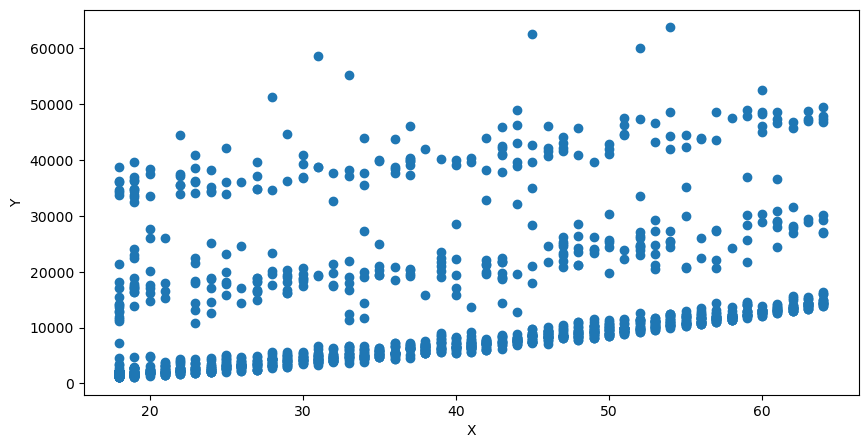

In [41]:
x = data['age']
y = data['charges']
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# 그래프가 질서가 없어 보인다.

In [42]:
# fit()을 통하여 학습시킨다. 이 때 fit()에 입력하는 데이터는 2차원 array이여야 하므로 reshape()를 이용한다.
x = np.array(data['age'])
y = np.array(data['charges'])

# 2차원데이터로 차원을 맞춘다.
x = x.reshape(1338,1)
y = y.reshape(1338,1) 

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [43]:
print("선형 회귀 모델 결과")
print("절편", lr.intercept_, "계수", lr.coef_)

선형 회귀 모델 결과
절편 [3165.89] 계수 [[257.72]]


In [44]:
# 결정계수 구하기 : 종속변수의 변동을 얼마나 잘 설명하는지 나타내는 지표
print(lr.score(x,y))

0.08940589967885804


In [45]:
# 19살, 64살에 의료비용을 얼마나 지출하는지 예측
x_new = [[19],[64]]  # 2차원
y_hat = lr.predict(x_new)
print(y_hat)  # 각각 약 8062, 19660달러 지출 예상

[[ 8062.61]
 [19660.13]]


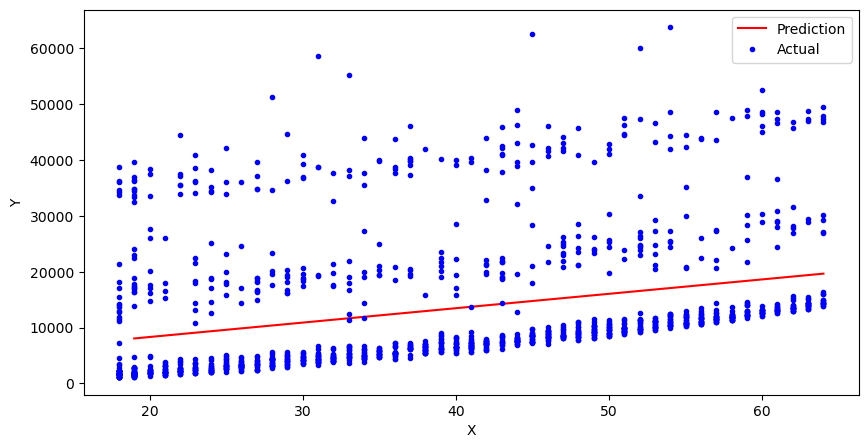

In [46]:
#  산점도 위에 회구선을 그어보자.
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r", label="Prediction")  # -r : 빨간색 실선
plt.plot(x, y, "b.", label="Actual")              # b. : 파란색 점
plt.legend(loc='upper right')                     # 범례를 오른쪽 위에 표시
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [47]:
# 경사하강법
from sklearn.linear_model import SGDRegressor

x = np.array(data['age'])
y = np.array(data['charges'])
x = x.reshape(1338,1)
y = y.reshape(1338,1)

In [48]:
x, y

(array([[19],
        [18],
        [28],
        ...,
        [18],
        [21],
        [61]], dtype=int64),
 array([[16884.92],
        [ 1725.55],
        [ 4449.46],
        ...,
        [ 1629.83],
        [ 2007.94],
        [29141.36]]))

In [49]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=200)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=200)

In [50]:
print("SGD 회귀 모델 결과")
print("절편", sgd_reg.intercept_, "계수", sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [-507.07] 계수 [772.38]


In [51]:
# 새로운 데이터 샘플을 SGD 회귀 모델에 입력한 뒤 나이에 따른 의료비용을 예측해보자.
x_new = [[19],[64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[14168.16 48925.29]


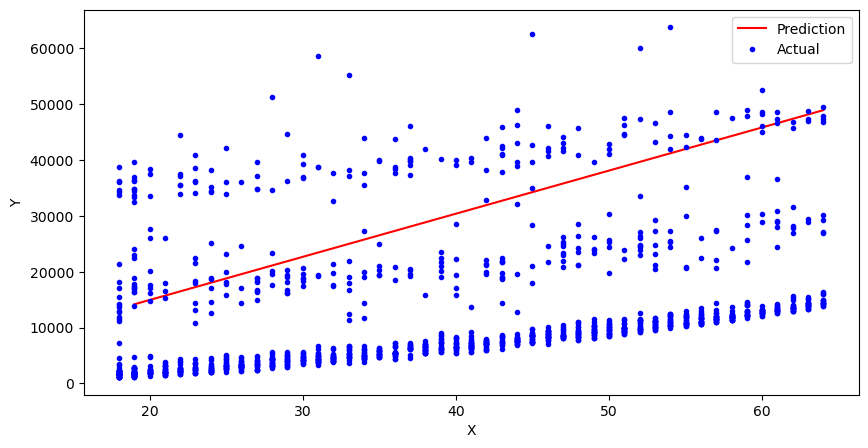

In [52]:
# SGD 선형 모델의 그림을 그려보자.
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, "-r", label="Prediction")  # -r : 빨간색 실선
plt.plot(x, y, "b.", label="Actual")              # b. : 파란색 점
plt.legend(loc='upper right')                     # 범례를 오른쪽 위에 표시
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [53]:
# 다항 회귀(Polynomial Regression) : 비선형의 형태를 가질 때의 모델
# 캐글의 80가지 시리얼 영양소 평가데이터를 통한 다항 회귀 분석
cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [54]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [55]:
cereal.shape

(77, 16)

In [56]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [57]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [58]:
cereal.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [59]:
# 첫 3개 열은 제외
cereal = cereal[cereal.columns[3:]]

In [60]:
# 설탕함유량(suger)가 0이상인 데이터만 추출
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [61]:
# 산점도 : 설탕함유량에 대한 영양등급평가
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)  # 인덱스를 다시 매김
cereal2

C:\Users\kakaopaysec\AppData\Local\Temp\ipykernel_16356\124950331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


,sugars,rating
0,0,64.533816
1,0,60.756112
2,0,63.005645
3,0,93.704912
4,0,68.235885
...,...,...
71,14,37.840594
72,14,33.174094
73,14,28.592785
74,15,31.230054


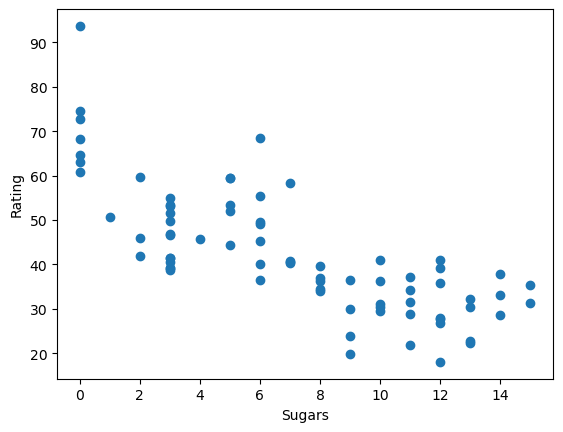

In [62]:
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x,y)
plt.xlabel("Sugars")
plt.ylabel("Rating")
plt.show()

In [63]:
# 학습데이터와 평가데이터를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [64]:
# PolynomialFeatures를 이용하여 2차 다항식 모델 학습
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [65]:
# 다항회귀모델 평가
import numpy as np
X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred =  reg.predict(X_test_poly)

np.set_printoptions(precision=2)
print(np.concatenate((pred.reshape(len(pred),1),
                     y_test.reshape(len(y_test), 1)), 1))   # 예측값과 실제값을 합친뒤 출력

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [66]:
# 모델의 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test)  
# reshape(-1,1) : 1차원 배열을 2차원 배열의 “한 열(column)” 형태로 바꿀 때 사용

print("MAE\t{}".format(round(mae,3)))
print("RMSE\t{}".format(round(rmse,3)))
print("R2\t{}".format(round(acc*100,3)))


MAE	4.606
RMSE	5.794
R2	74.376


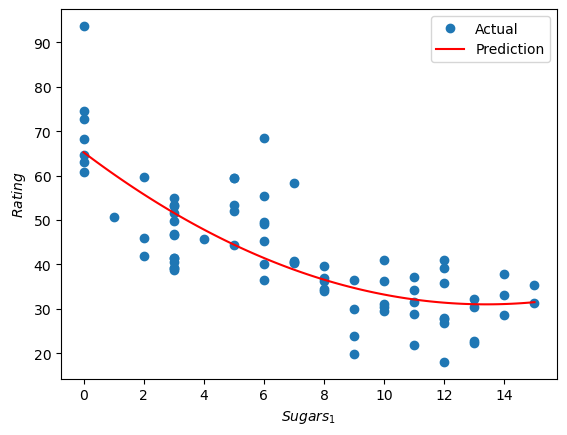

In [67]:
# 다항 회귀식 모델을 시각화
X_new =  np.linspace(0, 15, 100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel("$Sugars_1$")
plt.ylabel("$Rating$")
plt.show()

In [68]:
# 고차 다항 회귀분석 : 설명변수를 12개의 데이터로 설정하여 머신러닝 수행
X = cereal.iloc[:, :-1].values  # 마지막 열을 제외
y = cereal.iloc[:, -1].values   # 모든 행의 마지막 열

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [69]:
# 표준정규화(스케일링) 단계를 추가한 뒤, 다항 변수 변환과 모델 적합 과정을 수행
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # 평균 0, 표준편차 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [70]:
# 예측력 확인
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test), y_test)

print("MAE\t{}".format(round(mae,3)))
print("RMSE\t{}".format(round(rmse,3)))
print("R2\t{}".format(round(acc*100,3)))  # 정규화 시키니까 예측성능이 향상됨

MAE	2.152
RMSE	3.125
R2	92.509


In [71]:
# 릿지 회귀
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [72]:
from sklearn.linear_model import Ridge
import numpy as np
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [73]:
data=[]
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a, random_state=45)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))
    print(i, a)

df_ridge=pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge

0 0.001
1 0.01
2 0.1
3 1.0
4 10.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


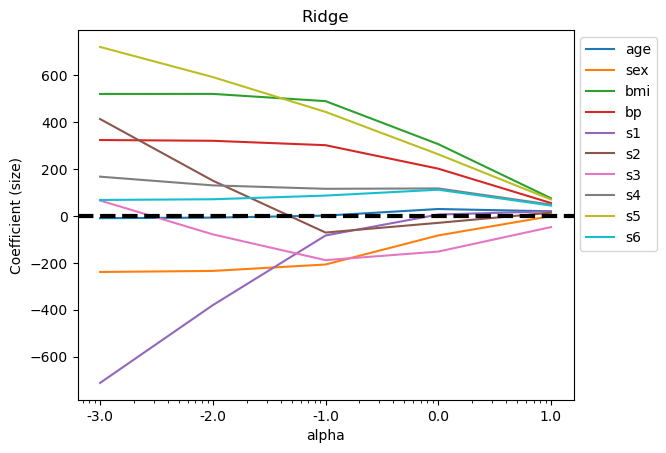

In [74]:
# alpha값이 증가하면서 회귀계수의 값이 0에 수렴하는지 시각화
# **Ridge 회귀의 규제 강도(α)**가 커질 때 회귀계수(coefficient)가 어떻게 변하는지 시각화
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)  # x축은 로그 스케일, y축은 선형 스케일로 그래프를 그림
plt.xticks(alpha, labels=np.log10(alpha))  
# x축 tick 위치를 alpha 값에 맞추고 tick 라벨은 **log10(alpha)**로 표시 예: α = [0.01, 0.1, 1, 10] → 표시: [-2, -1, 0, 1]

plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title("Ridge")
plt.xlabel("alpha")
plt.ylabel("Coefficient (size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

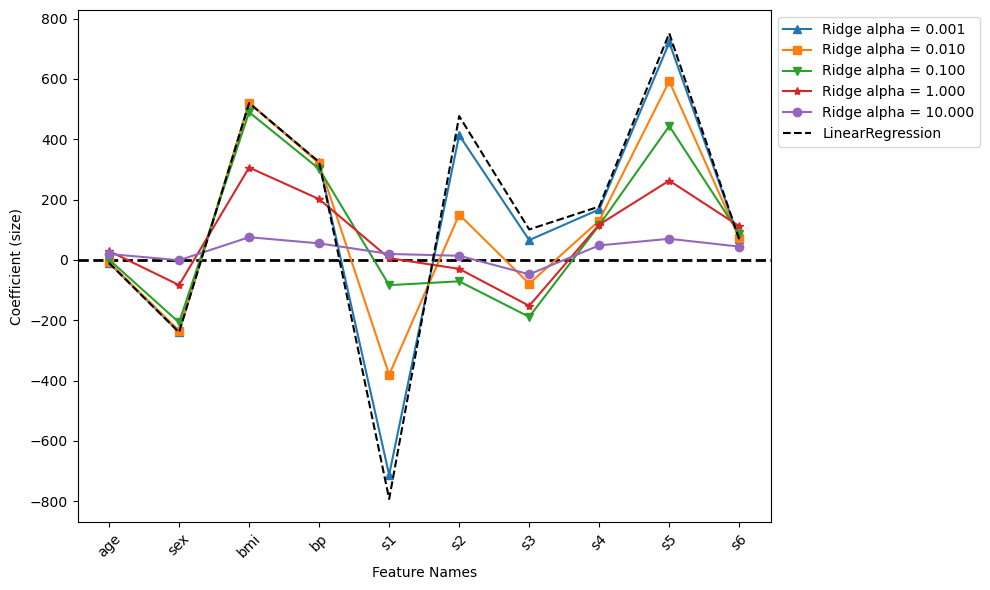

In [85]:
# 인덱스를 문자열로 통일 (소수 셋째자리까지)
df_ridge.index = df_ridge.index.map(lambda v: f"{float(v):.3f}")

plt.figure(figsize=(10,6))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

plt.plot(df_ridge.loc["0.001"], '^-', label='Ridge alpha = 0.001')
plt.plot(df_ridge.loc["0.010"], 's-', label='Ridge alpha = 0.010')
plt.plot(df_ridge.loc["0.100"], 'v-', label='Ridge alpha = 0.100')
plt.plot(df_ridge.loc["1.000"],  '*-', label='Ridge alpha = 1.000')
plt.plot(df_ridge.loc["10.000"], 'o-', label='Ridge alpha = 10.000')

# LinearRegression 계수
coef_lr = lr.coef_.ravel()
features = df_ridge.columns
plt.plot(features, coef_lr, 'k--', label='LinearRegression')

plt.xlabel("Feature Names")
plt.ylabel("Coefficient (size)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()



In [87]:
# 라쏘 회귀 모델 : 회수(sparse) 모델을 만들 수 있음
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd

alpha = np.logspace(-3, 1, 5)   # 0.001 ~ 10, 총 5개

coefs = []  # 각 alpha에서의 계수들을 저장할 리스트

for a in alpha:
    lasso = Lasso(alpha=a, random_state=45)
    lasso.fit(x, y)      # y가 Series면 OK, DataFrame이면 y.values.ravel() 추천
    coefs.append(lasso.coef_)   # 1차원 배열

# 1) 루프 끝난 뒤에 한 번만 DataFrame 생성
df_lasso = pd.DataFrame(coefs, index=alpha, columns=x.columns)

# 2) (선택) 인덱스를 문자열로 깔끔하게 만들고 싶으면
df_lasso.index = df_lasso.index.map(lambda v: f"{v:.3f}")

df_lasso


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


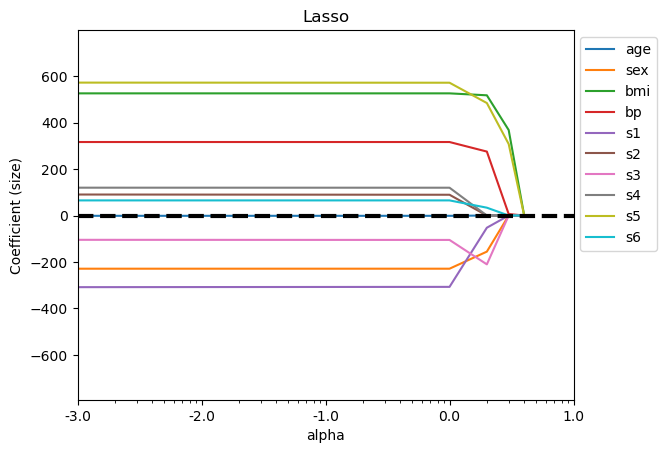

In [88]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title("Lasso")
plt.xlabel("alpha")
plt.ylabel("Coefficient (size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

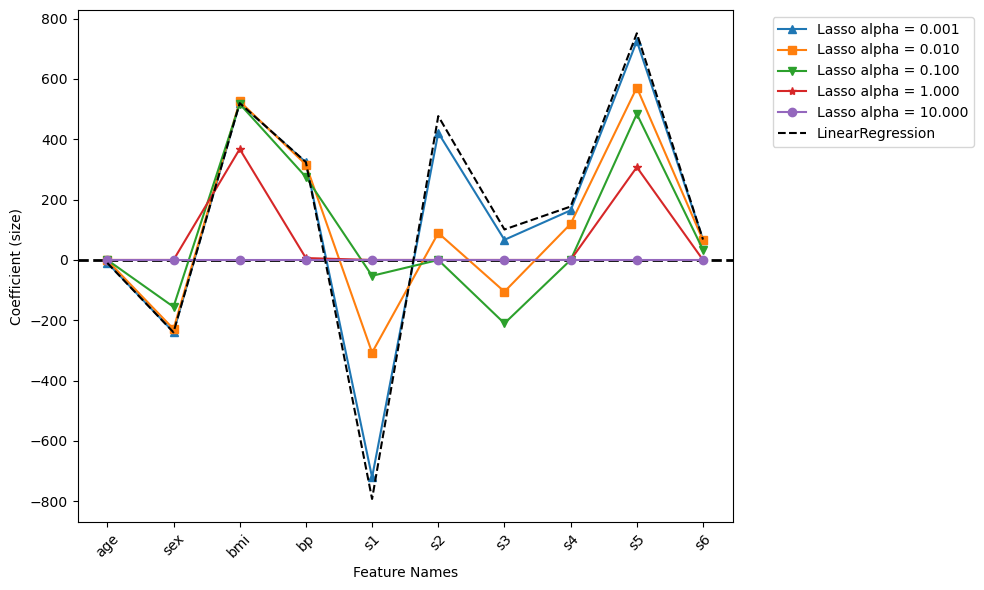

In [91]:
# MSE를 사용한 회귀모델과 비교
import matplotlib.pyplot as plt

# 1) 인덱스/컬럼 정리
features = df_lasso.columns          # 특성 이름
alphas   = df_lasso.index            # Lasso에서 사용한 alpha 값들

# (선택) 인덱스를 보기 좋게 문자열로 바꾸고 싶으면:
# df_lasso.index = df_lasso.index.map(lambda v: f"{float(v):.3f}")
# alphas = df_lasso.index

# 2) LinearRegression 계수 1차원으로 맞추기
lrcoef_ = lr.coef_.ravel()   # (n_features,) 형태로

plt.figure(figsize=(10,6))
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)

# 3) 여러 alpha에 대한 Lasso 계수 그리기
markers = ['^','s','v','*','o']  # alpha 개수에 맞춰서

for a, m in zip(alphas, markers):
    plt.plot(features, df_lasso.loc[a], m+'-', label=f"Lasso alpha = {a}")

# 4) LinearRegression 계수 같이 표시
plt.plot(features, lrcoef_, 'k--', label="LinearRegression")

plt.xlabel("Feature Names")
plt.ylabel("Coefficient (size)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [92]:
# 엘라스틱넷 : 릿지 회귀와 라쏘 회귀를 절충한 모델
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5, random_state=45)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))
    
df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


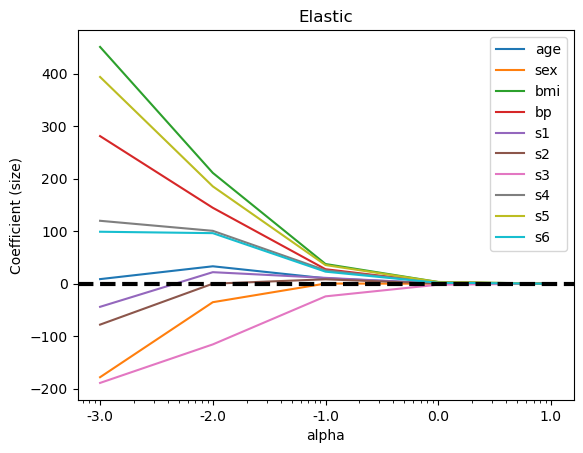

In [93]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

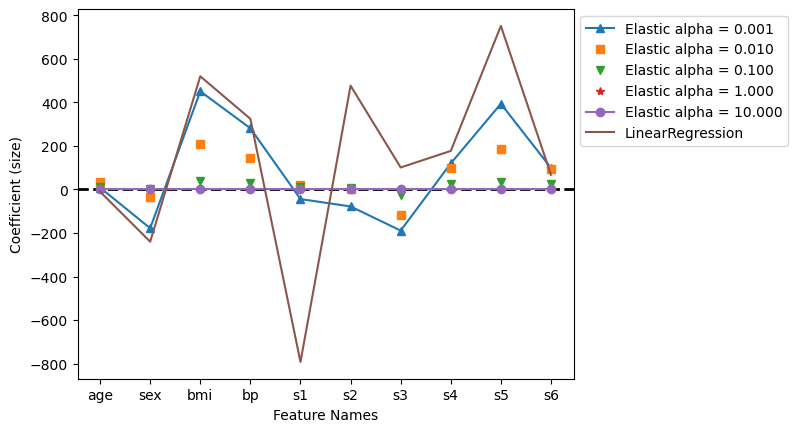

In [94]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
# alpha값이 증가하면서 회귀계수가 0이 되는 것을 확인할 수 있다.

In [96]:
# 로지스틱 회귀 : 반응변수가 범주형인 경우에 적용하는 회귀분석 모델
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [100]:
body = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [101]:
# gender 변수는 남자이면 0, 여자이면 1로 바꿈
# class 변수는 A인경우 1, 아니면 0으로 바꿈
body['gender'] = np.where(body['gender']=='M', 0, 1)
body['class_1'] = np.where(body['class']=='A', 1, 0)

In [102]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [104]:
# 설명변수 X와 종속변수 Y를 나눈뒤, 사이킷런의 train_test_split으로 학습데이터와 테스트데이터를 0.7:0.3의 비율로 나눈다.
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1'])) 
# 두 개의 타깃 컬럼(class, class_1)을 제외하고 나머지 모든 feature만 자동으로 선택
feature_columns

['age',
 'body fat_%',
 'broad jump_cm',
 'diastolic',
 'gender',
 'gripForce',
 'height_cm',
 'sit and bend forward_cm',
 'sit-ups counts',
 'systolic',
 'weight_kg']

In [103]:
x =  body[feature_columns]
y = body['class_1']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, train_size = .7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [105]:
# LogisticRegression을 import한 뒤 모델에 데이터 학습시켜보자.
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=45)
logR.fit(train_x, train_y)

LogisticRegression(random_state=45)

In [107]:
proba = pd.DataFrame(logR.predict_proba(train_x))
cs = logR.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Not A,A,decision_function
0,1.000000,7.650021e-09,-18.688557
1,1.000000,4.092490e-08,-17.011527
2,1.000000,5.231594e-08,-16.765965
3,1.000000,5.411443e-08,-16.732165
4,1.000000,6.783213e-08,-16.506230
...,...,...,...
9370,0.001432,9.985675e-01,6.546921
9371,0.001405,9.985955e-01,6.566647
9372,0.001365,9.986346e-01,6.594961
9373,0.000447,9.995529e-01,7.712311


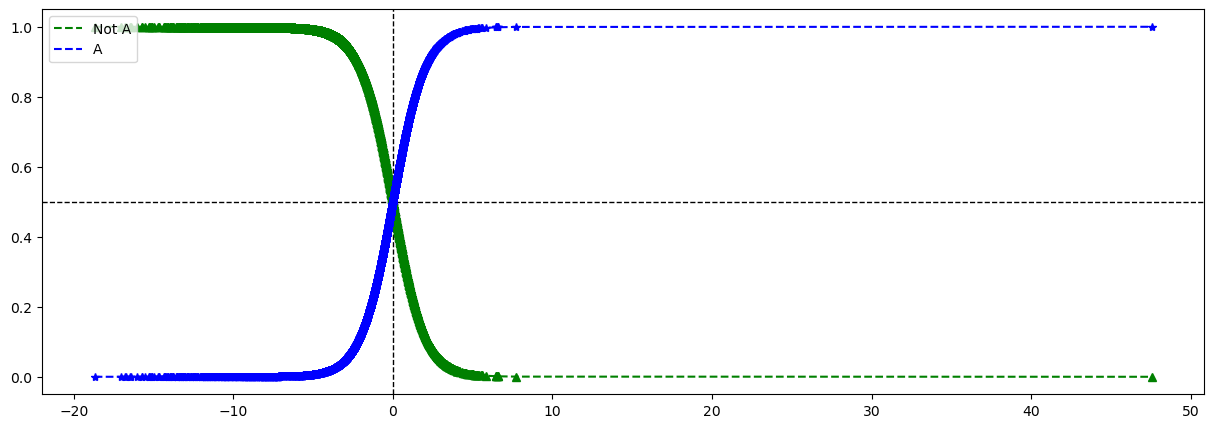

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')
plt.show()

In [109]:
# 모델 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print("\n")
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[2764  250]
 [ 356  648]]


정확도	84.92%
정밀도	72.16%
재현율	64.54%
F1	68.14%


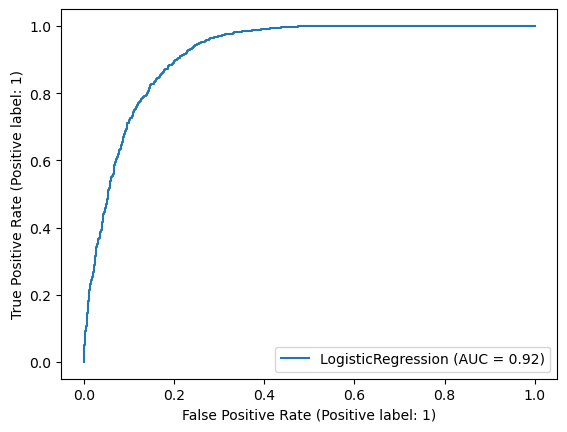

In [110]:
# ROC 커브와 AUC 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logR, test_x, test_y)
plt.show()

In [112]:
# 소프트맥스 회귀
body = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [118]:
# gender에서 남자는 0, 여자는 1로 변환
# class는 A : 0, B : 1, C : 2, d : 3으로 변환
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class 2,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3,3
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3,3


In [119]:
feature_columns = list(body.columns.difference(['class', 'class_2'])) 
# 두 개의 타깃 컬럼(class, class_1)을 제외하고 나머지 모든 feature만 자동으로 선택
feature_columns

['age',
 'body fat_%',
 'broad jump_cm',
 'class 2',
 'diastolic',
 'gender',
 'gripForce',
 'height_cm',
 'sit and bend forward_cm',
 'sit-ups counts',
 'systolic',
 'weight_kg']

In [120]:
x =  body[feature_columns]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, train_size = .7, random_state = 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [121]:
# LogisticRegression에서 소프트맥스 회귀를 수행하기 위한 매개변수를 설정한뒤 fit 메서드로 데이터를 모델에 학습
from sklearn.linear_model import LogisticRegression

softm = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=45, C=10)
softm.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial', random_state=45)

In [122]:
# 예측값을 pred에 저장, 혼동행렬과 정확도를 구해보자.
from sklearn.metrics import confusion_matrix, accuracy_score

pred = softm.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))

[[730 256  18   0]
 [252 457 269  26]
 [ 75 208 544 178]
 [ 11  39 203 752]]


정확도	61.8%


In [123]:
softm.predict([test_x.iloc[-1, :]])

array([0], dtype=int64)

In [125]:
softm.predict_proba([test_x.iloc[-1,:]])

array([[7.90e-01, 1.87e-01, 2.28e-02, 3.57e-04]])

In [127]:
# 서포트 벡터 머신
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


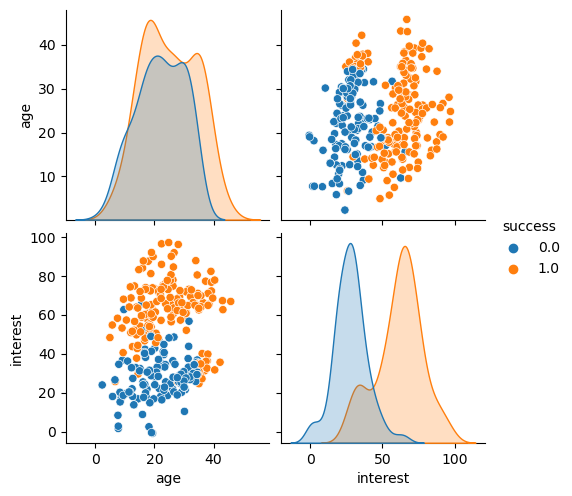

In [128]:
# 산점도
sns.pairplot(hue='success', data=c)

In [133]:
from sklearn.model_selection import train_test_split
x = c[['age', 'interest']]
y = c['success']

train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=.7, random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(207, 2) (90, 2) (207,) (90,)


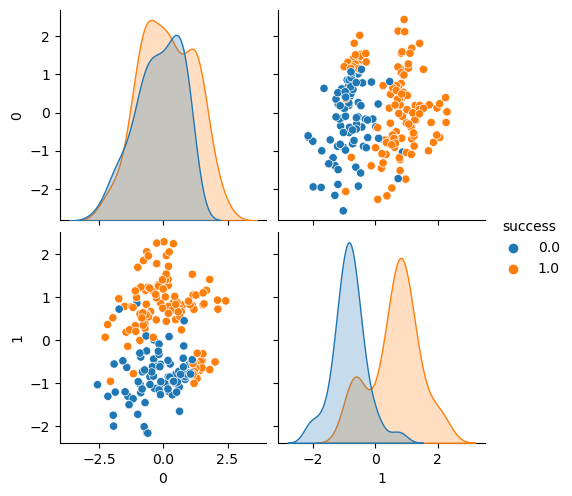

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x), train_y.reset_index(drop=True)], axis=1), hue='success')

In [135]:
from sklearn.svm import SVC

clf = SVC(C=.5, random_state=45)
clf.fit(train_x, train_y)

SVC(C=0.5, random_state=45)

In [136]:
# 테스트데이터로 모델평가 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

# 1) 혼동행렬
test_cm = confusion_matrix(test_y, pred)

# 2) 성능 지표
test_acc  = accuracy_score(test_y, pred)
test_prc  = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1   = f1_score(test_y, pred)

# 출력
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


In [137]:
# 테스트데이터로 모델평가 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

# 1) 혼동행렬
test_cm = confusion_matrix(test_y, pred)

# 2) 성능 지표
test_acc  = accuracy_score(test_y, pred)
test_prc  = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1   = f1_score(test_y, pred)

# 출력
print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))


[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


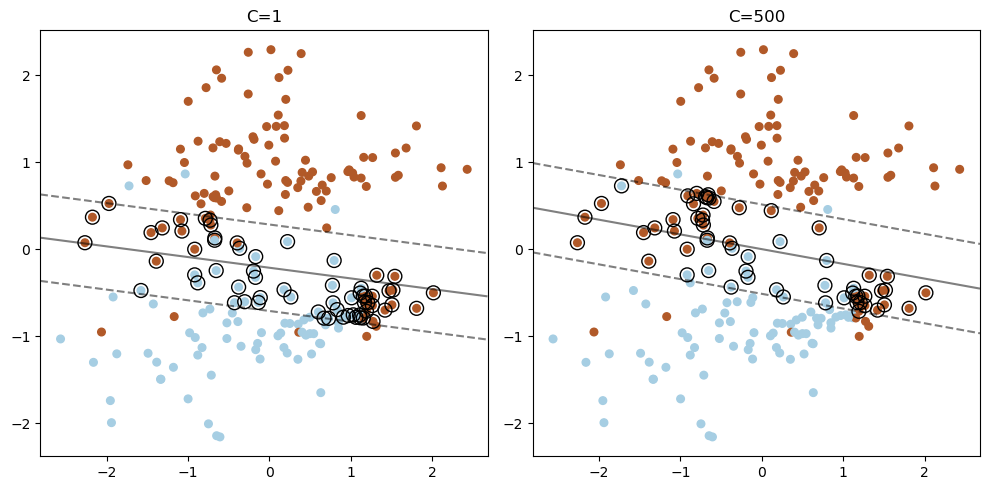

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(train_x, train_y)
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(train_x)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = train_x[support_vector_indices]

    plt.subplot(1, 2, i +1)
    plt.scatter(train_x[:, 0], train_x[:, 1], c =train_y, s =30, cmap =plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()
# c값 : 정규화정도, 실제 분류에서 c값을 튜닝

In [ ]:
# Support Vector Regression : 서포트벡터 방식으로 회귀분석
